In [1]:
import numpy as np 
import matplotlib.pyplot as plt
original_data = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/diagnosis514/nor_hb_simple_all_1d.npy')
original_label = np.load('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/allData/diagnosis514/label.npy')
# for i in range(514):
#     plt.figure()
#     plt.imshow(data[i])
#     plt.title(f'sub - {i} - label - {label[i]}')

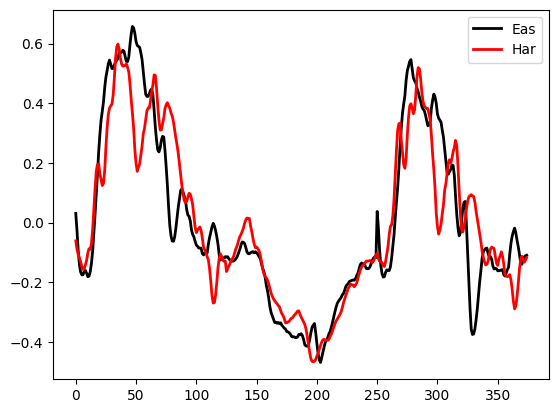

In [20]:
easy_subjects = [487, 121, 317, 346, 7, 170, 84, 383, ]
hard_subjects = [396, 91, 411, 334, 497, 0, 373, 201, 484, 127, ]


easy_subjects = np.array(easy_subjects)
hard_subjects = np.array(hard_subjects)
plt.figure()
plt.plot(original_data[easy_subjects].mean(axis=(0,1)), 'k', linewidth=2, label='Eas')
plt.plot(original_data[hard_subjects].mean(axis=(0,1)), 'r', linewidth=2, label='Har')
plt.legend()
plt.show()

# for id, sub in enumerate(easy_subjects):
#     plt.figure(figsize=(15, 10))
#     plt.subplot(1, 2, 1)
#     plt.imshow(original_data[easy_subjects[id]])
#     plt.subplot(1, 2, 2)
#     plt.imshow(original_data[hard_subjects[id]])
    

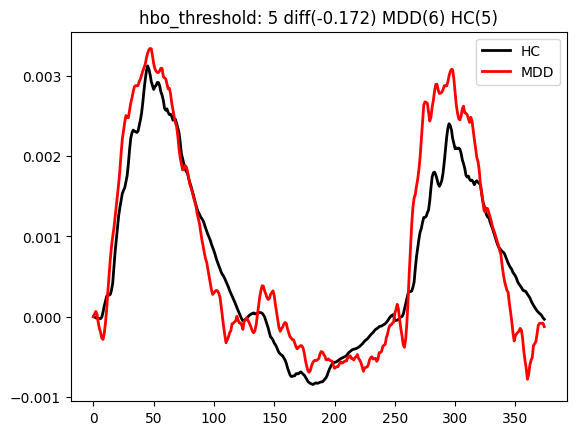

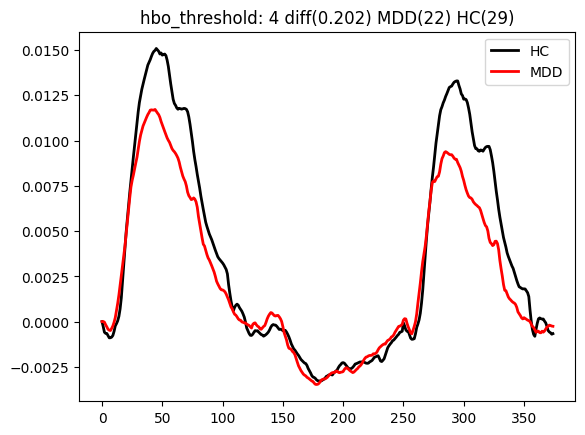

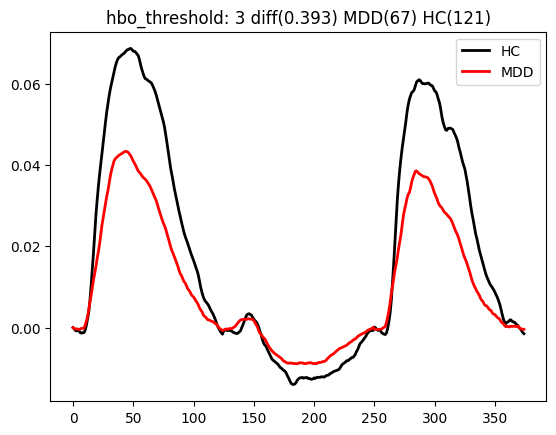

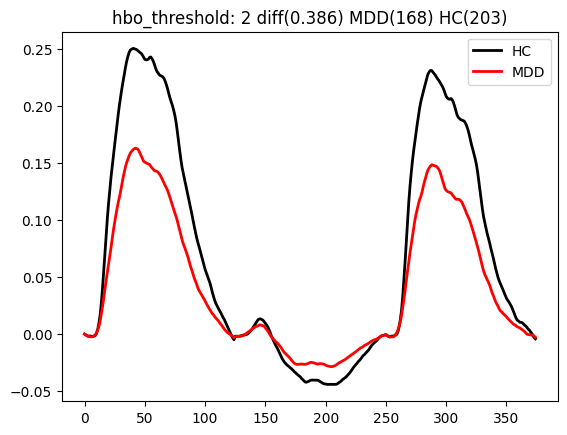

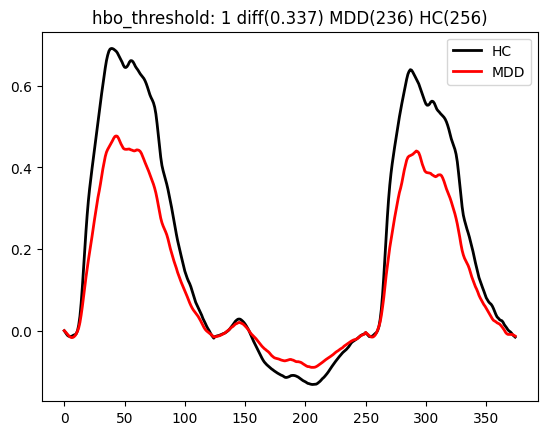

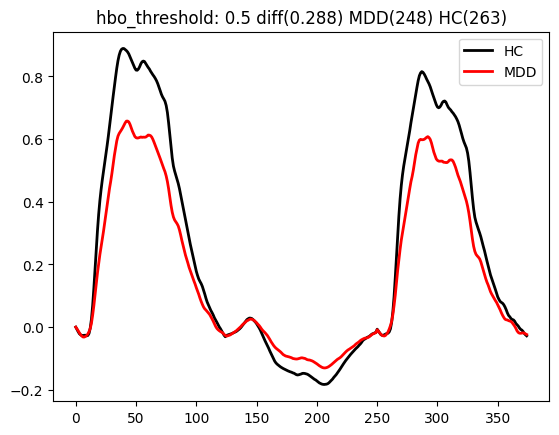

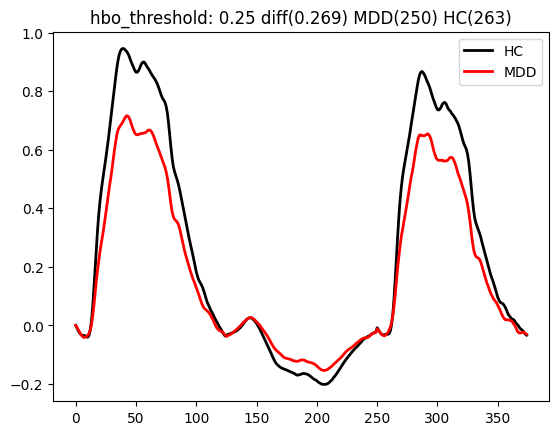

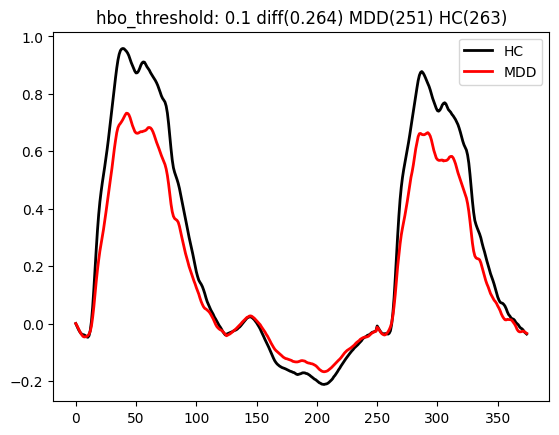

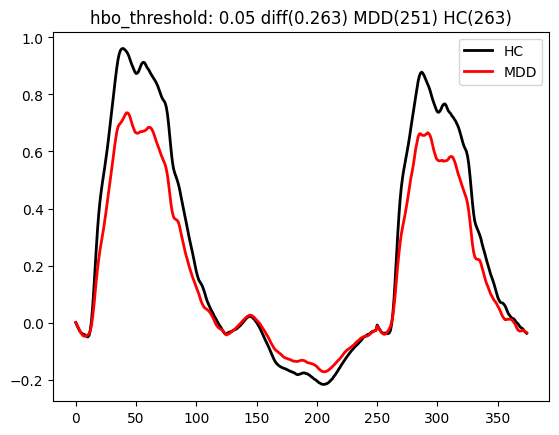

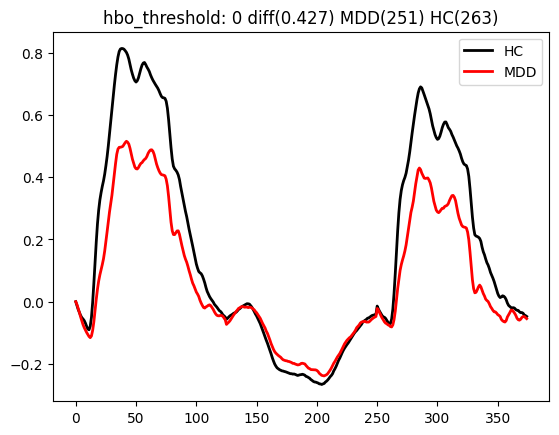

In [12]:
i = 132 

def hb_period_mean(data, hbo_start=10, hbo_end=70):
    return np.mean(data[hbo_start:hbo_end]) 


hbo_threshold = 2
hbr_threshold = 2


for hbo_threshold in [5, 4, 3, 2, 1, 0.5, 0.25, 0.1, 0.05, 0]:
    data = original_data.copy()
    HC_subject_count = 0
    MDD_subject_count = 0
    for i in range(514):
        all_data = []

        # plt.figure()
        # plt.title(f'sub - {i} - label - {label[i]}')
        ch_count = 0
        for ch in range(52):
            
            pre_task_hbo = hb_period_mean(data[i][ch], 0, 10)
            task_hbo = hb_period_mean(data[i][ch], 10, 70)
            
            pre_task_hbr = hb_period_mean(data[i][ch], 125, 135)
            task_hbr = hb_period_mean(data[i][ch], 135, 195)
            if hbo_threshold != 0:
                if (task_hbo - pre_task_hbo > hbo_threshold) and (task_hbr - pre_task_hbr < hbr_threshold):
                    # plt.plot(data[i][ch])
                    ch_count += 1
                else:
                    data[i][ch] *= 0
            else:
                ch_count = 52 
            data[i][ch] -= data[i][ch][0]                
            # if (task_hbo - pre_task_hbo > hbo_threshold) :
            #     # plt.plot(data[i][ch])
            #     all_data.append(data[i][ch])        
        if ch_count > 0: 
            if original_label[i] == 0:
                HC_subject_count += 1
            else:   
                MDD_subject_count += 1
            
                
                
        # all_data = np.array(all_data)                 
        # if len(all_data) > 0: 
        #     if label[i] == 0:
        #         HC_subject.append(all_data.mean(axis=0))
        #     else:
        #         MDD_subject.append(all_data.mean(axis=0))
                
        # all_data = np.array(all_data)
        # plt.plot(all_data.mean(axis=0), 'k', linewidth=2)
        # print(all_data.shape)   
        
    plt.figure()
    plt.plot(data[original_label==0].mean(axis=(0,1)), 'k', linewidth=2, label='HC')
    plt.plot(data[original_label==1].mean(axis=(0,1)), 'r', linewidth=2, label='MDD')
    HC_hbo_task = hb_period_mean(data[original_label==0].mean(axis=(0,1)), 10, 70)
    MDD_hbo_task = hb_period_mean(data[original_label==1].mean(axis=(0,1)), 10, 70)
    difference_hbo_task_hc_mdd = (HC_hbo_task - MDD_hbo_task) / HC_hbo_task
    plt.title(f'hbo_threshold: {hbo_threshold} diff({round(difference_hbo_task_hc_mdd, 3)}) MDD({MDD_subject_count}) HC({HC_subject_count})')

    plt.legend()

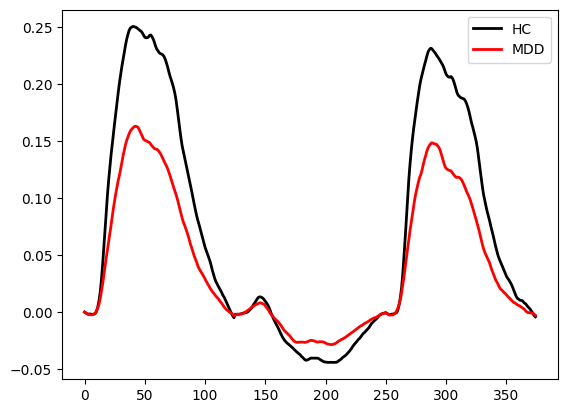

In [54]:
HC_subject = np.array(HC_subject)
MDD_subject = np.array(MDD_subject)
HC_subject.shape, MDD_subject.shape

# plt.figure()
# plt.plot(HC_subject.mean(axis=0), 'k', linewidth=2, label='HC')
# plt.plot(MDD_subject.mean(axis=0), 'r', linewidth=2, label='MDD')
# plt.legend()


plt.figure()
plt.plot(data[label==0].mean(axis=(0,1)), 'k', linewidth=2, label='HC')
plt.plot(data[label==1].mean(axis=(0,1)), 'r', linewidth=2, label='MDD')
plt.legend()